## Importing Libraries and Defining Variables

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import aes_cipher
import steg
import psnr_mse as pm

### For Encryption and Embedding Process

In [2]:
ee_password = "password123"       # password used for encryption and embedding

message = b"Hello, this is a secret message"         # message to encrypt and embed

stego_prefix = "stego_"
cover_path = os.path.join('images', 'standard', 'cover')
stego_path = os.path.join('images', 'standard', 'stego')

cover_images_list = [i for i in os.listdir(cover_path) if '.png' in i]

cover_image = cover_images_list[1]                    # change the index here to select different cover images

output_stego_image = stego_prefix + cover_image

print("Selected Cover Image: " + cover_image)
print("Output Stego Image: " + output_stego_image)


cover_image = os.path.join(cover_path, cover_image)                # cover image to encrypt and embed
output_stego_image = os.path.join(stego_path, output_stego_image)  # output image after encryption and embedding

print("\nPath to Cover Image: " + cover_image)
print("Path to Output Stego Image: " + output_stego_image)

Selected Cover Image: baboon.png
Output Stego Image: stego_baboon.png

Path to Cover Image: images\standard\cover\baboon.png
Path to Output Stego Image: images\standard\stego\stego_baboon.png


### For Extraction and Decryption Process

In [3]:
ed_password = "password123"       # password used for extracting and decryption

stego_path = os.path.join('images', 'standard', 'stego')

stego_images_list = [i for i in os.listdir(stego_path) if '.png' in i]

stego_image = stego_images_list[0]                   # change the index here to select different stego images

print("Selected Stego Image: " + stego_image)

stego_image = os.path.join(stego_path, stego_image)                # stego image to extract and decrypt

print("\nPath to Stego Image: " + stego_image)

Selected Stego Image: stego_airplane.png

Path to Stego Image: images\standard\stego\stego_airplane.png


In [4]:
def show_image(image: str, title: str):
    """ Show Image """
    
    img_to_show = cv2.imread(image)
    img_to_show = cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_to_show)
    plt.title(title)
    plt.show()

## Encryption and Embedding Process

### Encryption Process

In [5]:
aes_encrypt = aes_cipher.AES_Cipher(key=ee_password, mode="ECB")
encrypted_message = aes_encrypt.encrypt(data=message)
print("Ciphertext:", encrypted_message)

Ciphertext: b'\xf5\x19\x0c\x98\xcb\xeb\xf7\x8c\x12\xcc\xa2\xc8g\xa3\x93\xf3h\xe3\x9b\xf0\xa9mdN\x86m\xa1\x90qf\xb87'


### Embedding Process

In [6]:
steg_embed = steg.Steg(image=cover_image, stego=output_stego_image)
# print("Capacity of '" + os.path.basename(cover_image) + "': " + str(steg_embed.get_max_capacity()//8) + " bytes")
output_stego_image_data = steg_embed.embed(encrypted_message)
print(f"Output Stego Image created is in '{output_stego_image}'")

print("Output Stego Image Data in Numpy Array Format")
print("=============================================")
print(output_stego_image_data)

Output Stego Image created is in 'images\standard\stego\stego_baboon.png'
Output Stego Image Data in Numpy Array Format
[[[ 71 151 165]
  [ 31  56  63]
  [ 10  43  74]
  ...
  [ 68 119 117]
  [101 170 141]
  [118 188 179]]

 [[ 62 125 120]
  [ 33  97 135]
  [ 23  35  55]
  ...
  [ 98 140 122]
  [128 159 136]
  [ 74 138 120]]

 [[ 31  74  99]
  [ 46 118 132]
  [ 36  41  60]
  ...
  [ 90  93 118]
  [ 77  91  87]
  [ 49  80  96]]

 ...

 [[155 148 121]
  [150 156 123]
  [139 150 124]
  ...
  [ 60  73 110]
  [ 70  93  90]
  [ 60  80  81]]

 [[168 169 126]
  [151 151 117]
  [133 136 121]
  ...
  [ 68  84  73]
  [ 86  69  99]
  [ 71  63  80]]

 [[ 12  11   9]
  [ 11  12  10]
  [ 12  15  11]
  ...
  [  5   8   5]
  [  0   5   2]
  [  2   5   4]]]


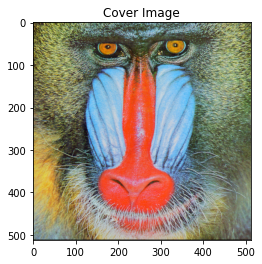

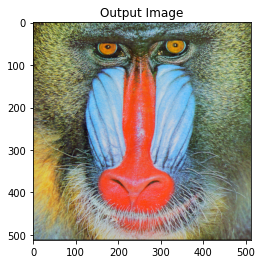

In [7]:

show_image(image=cover_image, title="Cover Image")
show_image(image=output_stego_image, title="Output Image")

## Extraction and Decryption Process

### Extraction Process

In [8]:
steg_extract = steg.Steg(stego=stego_image)
extracted_message = steg_extract.extract()
print("Extracted Ciphertext: ", extracted_message)

Extracted Ciphertext:  b'\xf5\x19\x0c\x98\xcb\xeb\xf7\x8c\x12\xcc\xa2\xc8g\xa3\x93\xf3h\xe3\x9b\xf0\xa9mdN\x86m\xa1\x90qf\xb87'


### Decryption Process

In [10]:
aes_decrypt = aes_cipher.AES_Cipher(key=ed_password, mode="ECB")
plaintext = aes_decrypt.decrypt(ciphertext=extracted_message)
print("Decrypted Message:", plaintext)         # check ed_password and ee_password, they have to be the same

Decrypted Message: b'Hello, this is a secret message'


## Evaluation Methods

### Cover Images and Stego Images

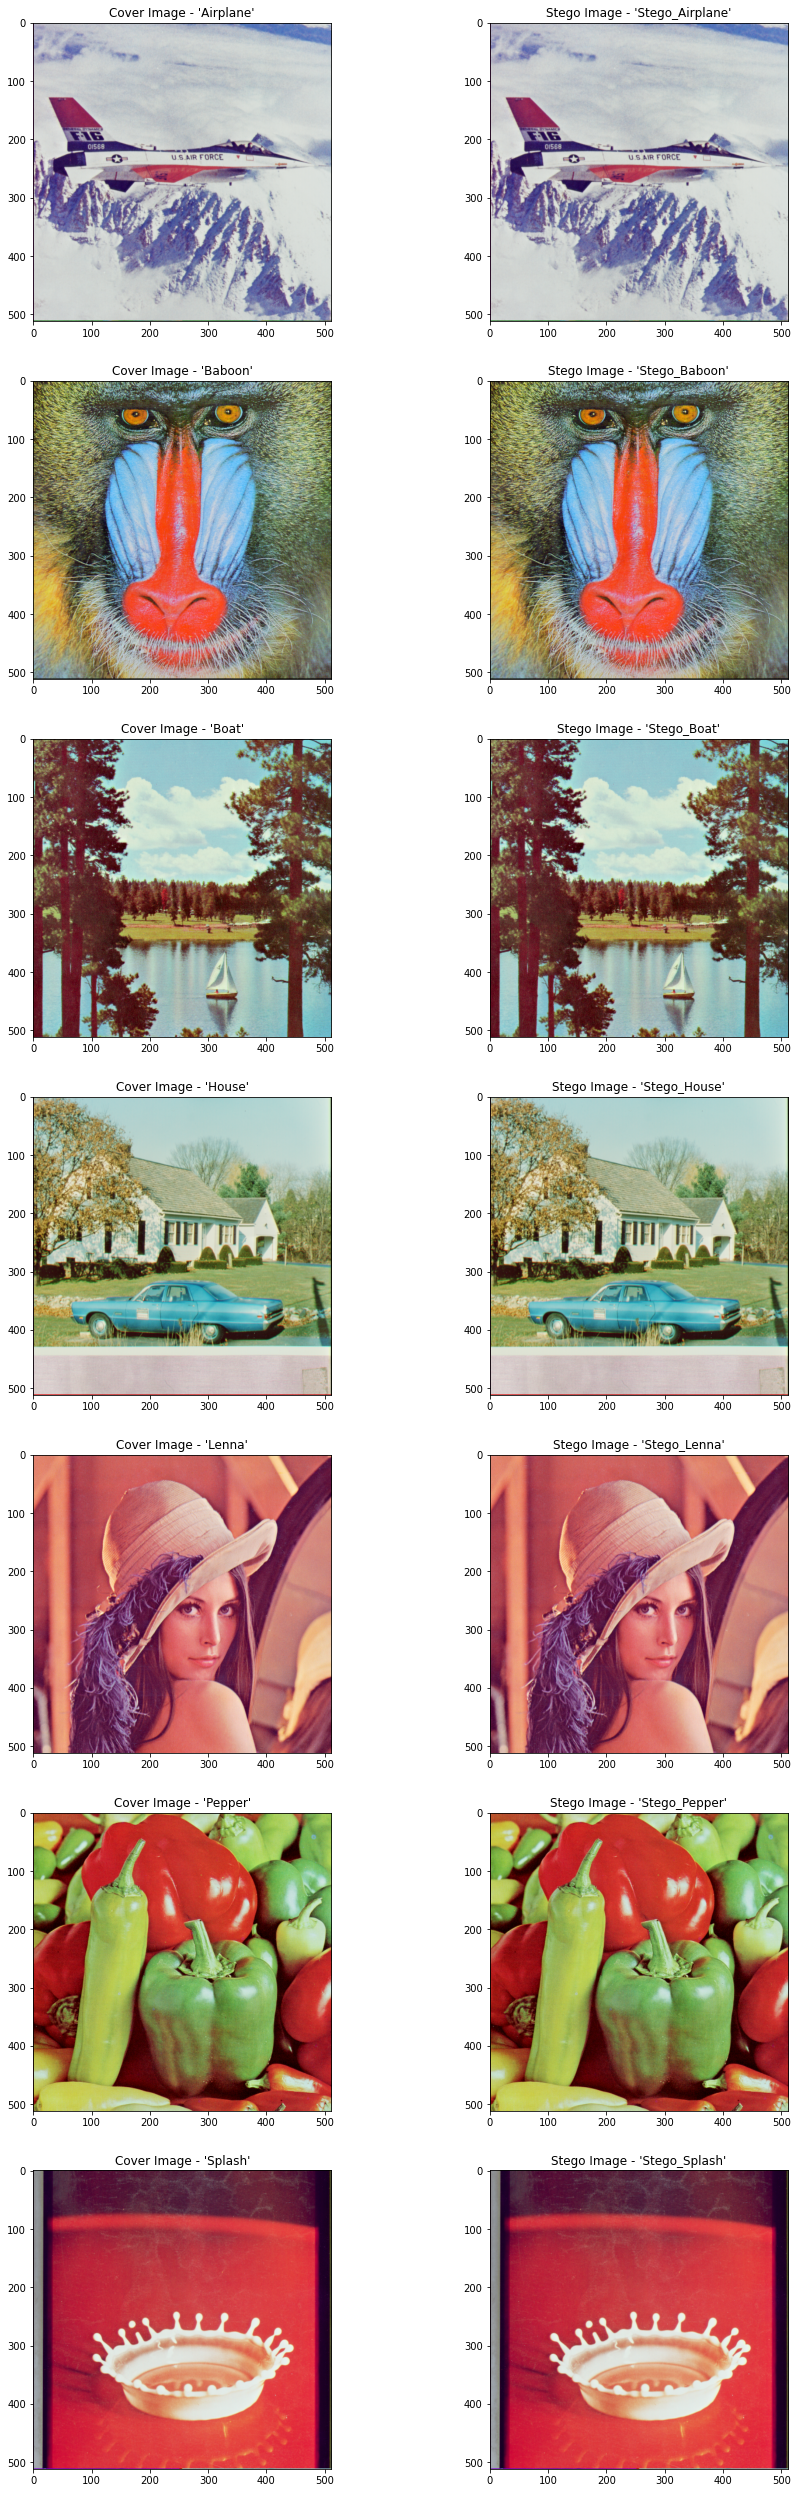

In [11]:
cover_images_list = [i for i in os.listdir(cover_path) if '.png' in i]
stego_images_list = [i for i in os.listdir(stego_path) if '.png' in i]

fig = plt.figure(figsize=(15, 45))
rows, columns = len(cover_images_list), 2


for i in range(rows):
    img = cv2.imread(os.path.join(cover_path, cover_images_list[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, (i*2)+1)
    plt.imshow(img)
    plt.title(f"Cover Image - '{os.path.basename(cover_images_list[i]).split('.')[0].title()}'")

for i in range(rows):
    img = cv2.imread(os.path.join(stego_path, stego_images_list[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, (i*2)+2)
    plt.imshow(img)
    plt.title(f"Stego Image - '{os.path.basename(stego_images_list[i]).split('.')[0].title()}'")
    
# plt.show()

In [12]:
for cover in cover_images_list:
    stego = stego_prefix + cover
    full_cover_path = os.path.join(cover_path, cover)
    full_stego_path = os.path.join(stego_path, stego)
#     print(full_cover_path, full_stego_path)
    original = cv2.imread(full_cover_path)
    stego_img = cv2.imread(full_stego_path)
    res_psnr = pm.PSNR(original, stego_img)
    res_mse = pm.MSE(original, stego_img)
    title = cover.split(".")[0].title()
    print(title)
    print("="*len(title))
    print("MSE:", res_mse)
    print("PSNR:", res_psnr, "dB")
    print(f"")

Airplane
MSE: 0.00022633870442708334
PSNR: 84.5832153523034 dB

Baboon
MSE: 0.000209808349609375
PSNR: 84.91257593325328 dB

Boat
====
MSE: 0.00020726521809895834
PSNR: 84.96553933135276 dB

House
=====
MSE: 0.000217437744140625
PSNR: 84.7574542714708 dB

Lenna
=====
MSE: 0.000209808349609375
PSNR: 84.91257593325328 dB

Pepper
MSE: 0.000213623046875
PSNR: 84.8343225581337 dB

Splash
MSE: 0.00020090738932291666
PSNR: 85.10084450584812 dB



### Capacity

In [13]:
for cover_image in cover_images_list:
    full_cover_image = os.path.join(cover_path, cover_image)
    lsb_steg = steg.Steg(image=full_cover_image)
    max_bits = lsb_steg.get_max_capacity()
    title = cover_image.split(".")[0].title()
    print(title)
    print("="*len(title))
    print(f"Max capacity in bits: {max_bits}")
    print(f"Max capacity in bytes: {max_bits // 8}")
    print(f"")

Airplane
Max capacity in bits: 786296
Max capacity in bytes: 98287

Baboon
Max capacity in bits: 786296
Max capacity in bytes: 98287

Boat
====
Max capacity in bits: 786296
Max capacity in bytes: 98287

House
=====
Max capacity in bits: 786296
Max capacity in bytes: 98287

Lenna
=====
Max capacity in bits: 786296
Max capacity in bytes: 98287

Pepper
Max capacity in bits: 786296
Max capacity in bytes: 98287

Splash
Max capacity in bits: 786296
Max capacity in bytes: 98287



### Distortion Measurement

In [14]:
import pprint

message_size_list = [64, 128, 512, 1024, 4096, 8192, 16384, 32768, 65536, 98287]
messages = []
eval_vals = []

aes = aes_cipher.AES_Cipher(key=ee_password, mode="ECB")

for i in message_size_list:
    try:
        with open(os.path.join('text_files', f'dummy_text_{i}.txt'), 'rb') as f:
            a = aes.encrypt(f.read())
            messages.append(a)
    except FileNotFoundError:
        print('error')
                            


print("done")

# print(type(messages[0]))

# Embedding secret messages of different sizes in all standard photos
for cover in cover_images_list:
    stego = stego_prefix + cover
    
    temp_psnr = []
    temp_mse = []

    for i in range(len(message_size_list)):
        full_cover_image = os.path.join("images", "standard", "pm_cover", cover)
        full_stego_image = os.path.join("images", "standard", "pm_stego", stego_prefix+cover.split(".")[0]+"_"+str(message_size_list[i])+".png")
        print(full_cover_image)
        print(full_stego_image)
        lsb_steg = steg.Steg(image=full_cover_image, stego=full_stego_image)
        lsb_steg.embed(messages[i])
        
        original = cv2.imread(full_cover_image)
        stego_img = cv2.imread(full_stego_image)
        res_psnr = pm.PSNR(original, stego_img)
        res_mse = pm.MSE(original, stego_img)
        
        temp_psnr.append(float("{:.5f}".format(res_psnr)))
        temp_mse.append(float("{:.5e}".format(res_mse)))
        
    eval_vals.append([temp_mse, temp_psnr])
        
pprint.pprint(eval_vals)

done
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_64.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_128.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_512.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_1024.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_4096.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_8192.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_16384.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_32768.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_65536.png
images\standard\pm_cover\airplane.png
images\standard\pm_stego\stego_airplane_98287.png
Not Enough Capacity


SystemExit: 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### PSNR and MSE Relation to Different Message Size

In [29]:
from tabulate import tabulate
    
for i, cover in enumerate(cover_images_list):
#     print('ok')
    tbt_data = []
    head = ['Bytes']
    head.extend(message_size_list)
    mse_val = ['MSE']
    mse_val.extend(eval_vals[i][0])
    psnr_val = ['PSNR(dB)']
    psnr_val.extend([str(i) + " dB" for i in eval_vals[i][1]])
    tbt_data.append(mse_val)
    tbt_data.append(psnr_val)
#     print(mse_val[1])
#     print(tbt_data)
    print(f"MSE and PSNR Values of '{cover.split('.')[0].title()}.png' Depending on the Size of Secret Message (in Bytes)")
    print(tabulate(tbt_data, headers=head, tablefmt="grid"))
    print("\n")

MSE and PSNR Values of 'Airplane.png' Depending on the Size of Secret Message (in Bytes)
+----------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+
| Bytes    | 64          | 128         | 512         | 1024        | 4096        | 8192       | 16384       | 32768       | 65536       | 98287       |
+==========+=============+=============+=============+=============+=============+============+=============+=============+=============+=============+
| MSE      | 0.000450134 | 0.000789642 | 0.00273895  | 0.00531006  | 0.021005    | 0.0415738  | 0.0834923   | 0.166924    | 0.332948    | 0.499799    |
+----------+-------------+-------------+-------------+-------------+-------------+------------+-------------+-------------+-------------+-------------+
| PSNR(dB) | 81.59738 dB | 79.1565 dB  | 73.75496 dB | 70.87981 dB | 64.90758 dB | 61.9426 dB | 58.91434 dB | 55.90563 dB | 52.90704 dB | 51.14285 dB |

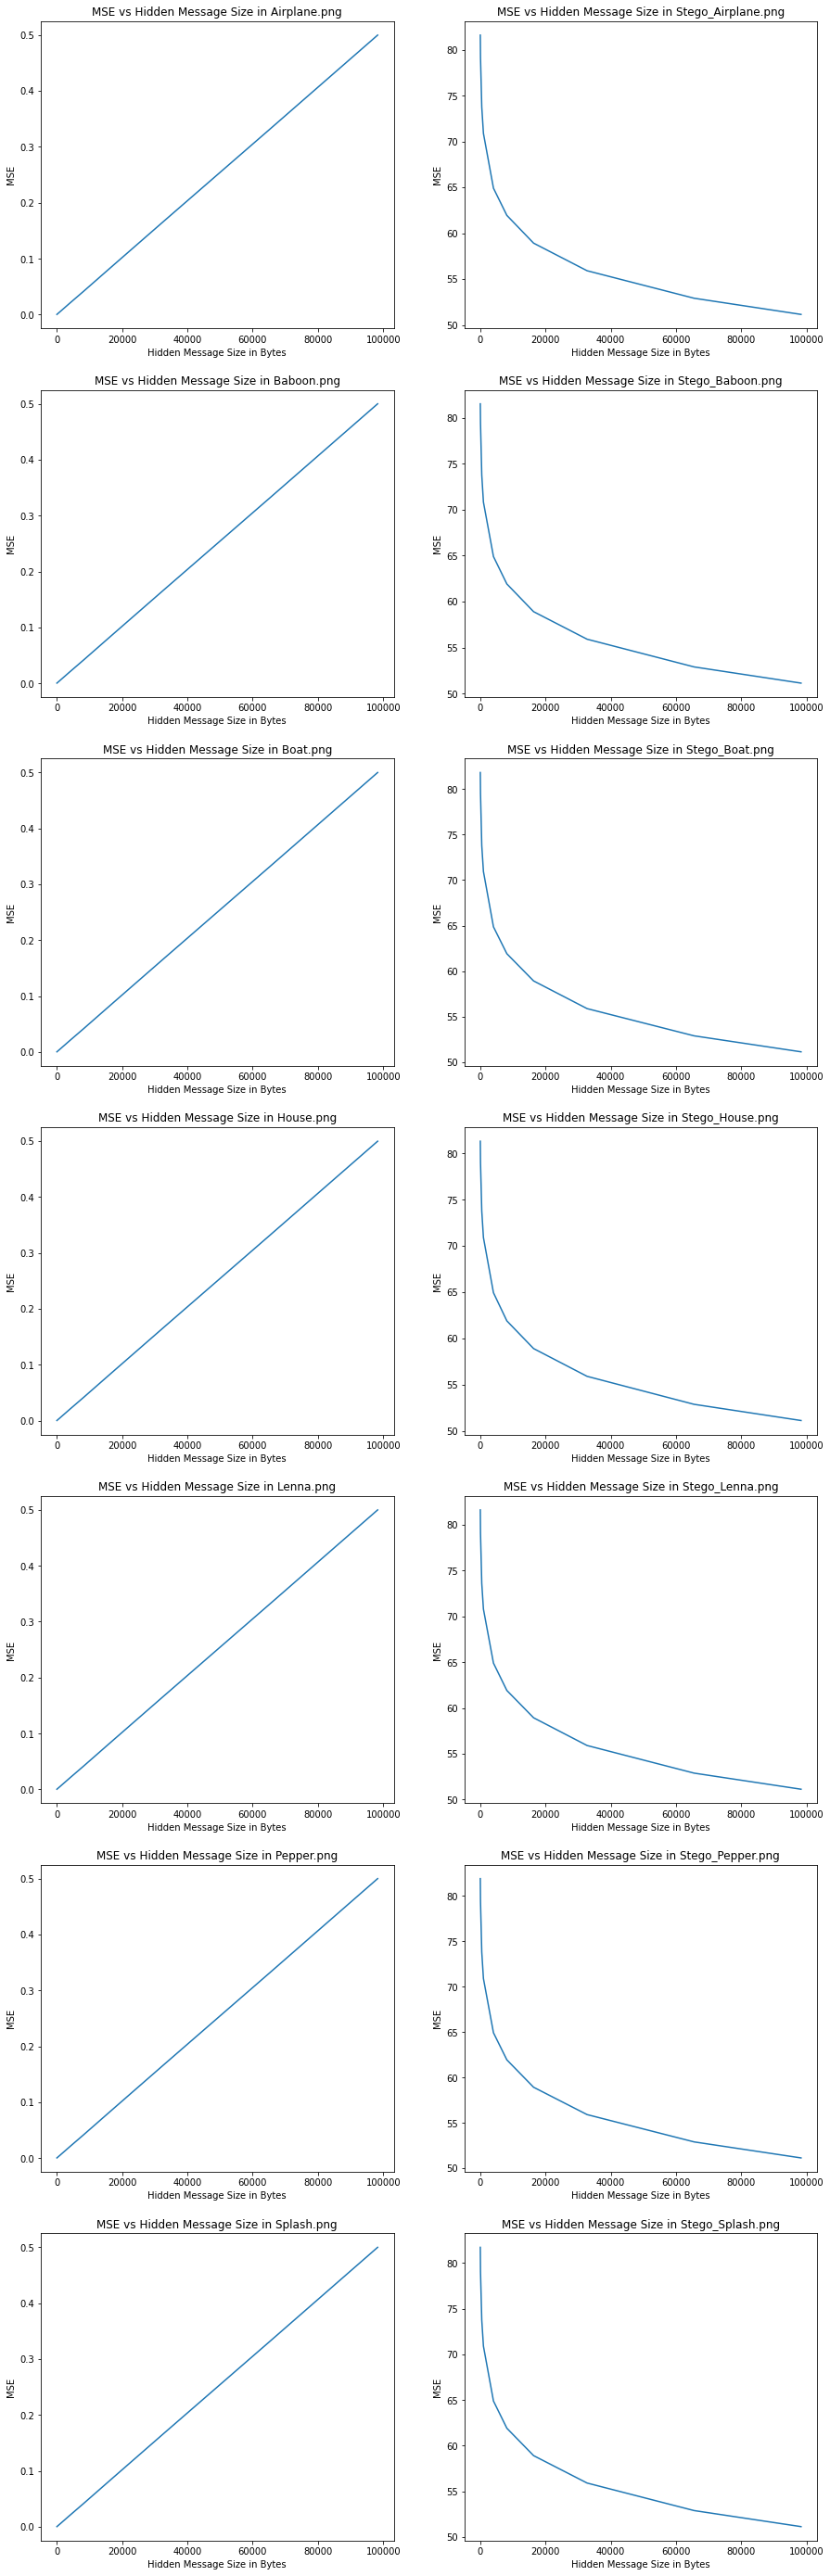

In [30]:
fig = plt.figure(figsize=(15, 50))
rows, columns = len(cover_images_list), 2

for i in range(rows):

    fig.add_subplot(rows, columns, (i*2)+1)
    plt.plot(message_size_list, eval_vals[0][0])
    plt.xlabel('Hidden Message Size in Bytes')
    plt.ylabel('MSE')
    plt.title(f"MSE vs Hidden Message Size in {os.path.basename(cover_images_list[i]).split('.')[0].title()}.png")
    
    
for i in range(rows):

    fig.add_subplot(rows, columns, (i*2)+2)
    plt.plot(message_size_list, eval_vals[i][1])
    plt.xlabel('Hidden Message Size in Bytes')
    plt.ylabel('MSE')
    plt.title(f"MSE vs Hidden Message Size in {os.path.basename(stego_images_list[i]).split('.')[0].title()}.png")


plt.show()



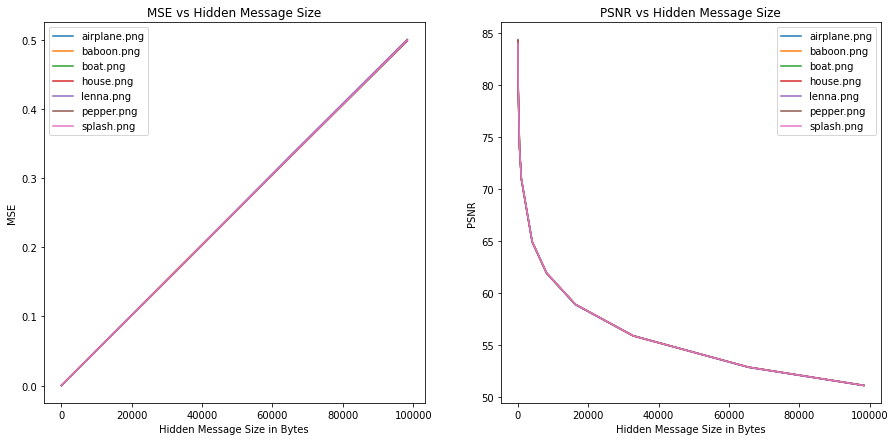

In [19]:
fig = plt.figure(figsize=(15, 7))
rows, columns = 1, 2

# MSE plot
fig.add_subplot(rows, columns, 1)
for i, cover_image in enumerate(cover_images_list):
    plt.plot(message_size_list, eval_vals[i][0], label = cover_image)

plt.legend()
plt.xlabel('Hidden Message Size in Bytes')
plt.ylabel('MSE')
plt.title("MSE vs Hidden Message Size")


# PSNR plot
fig.add_subplot(rows, columns, 2)
for i, cover_image in enumerate(cover_images_list):
    plt.plot(message_size_list, eval_vals[i][1], label = cover_image)

plt.legend()
plt.xlabel('Hidden Message Size in Bytes')
plt.ylabel('PSNR')
plt.title("PSNR vs Hidden Message Size")
                    
plt.show()

## Random Testings

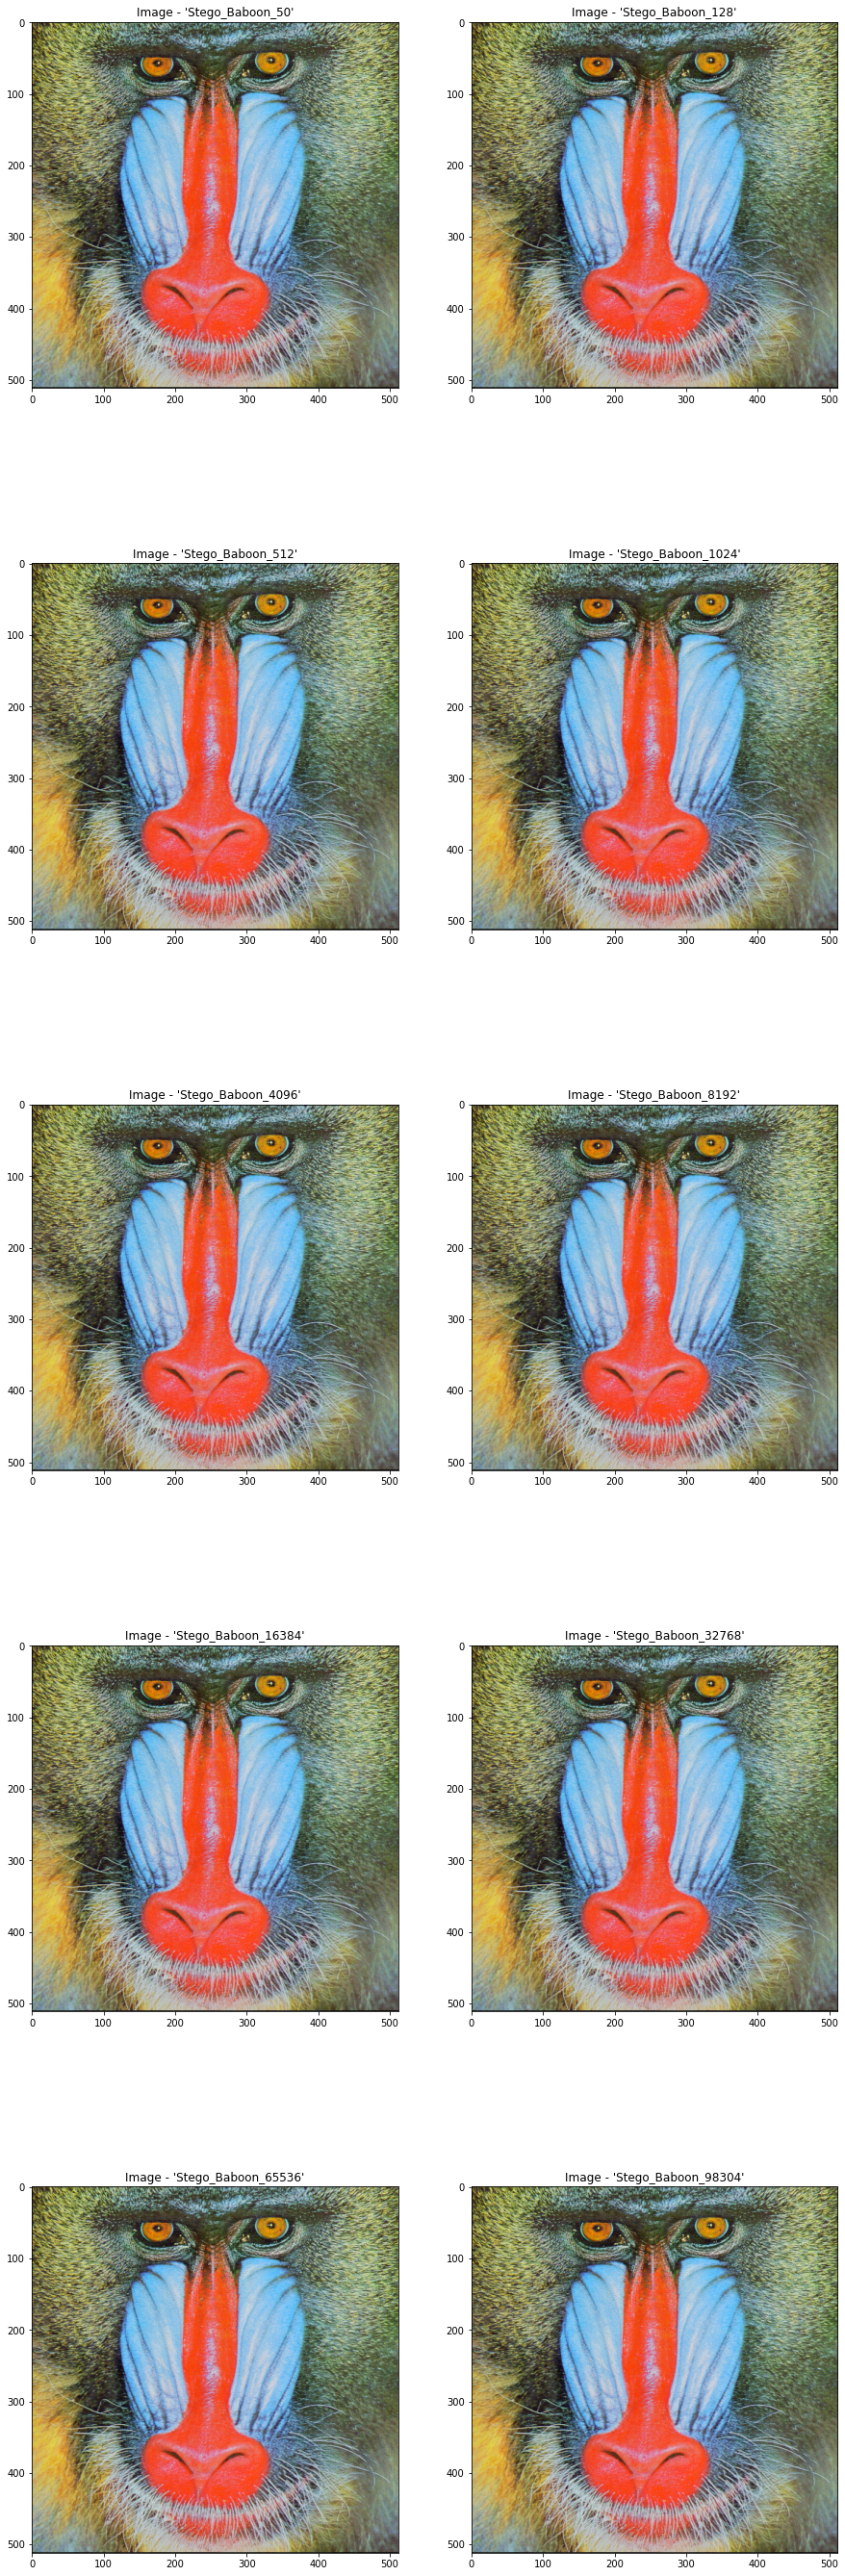

In [22]:
fig = plt.figure(figsize=(15, 50))
rows, columns = 5, 2

pm_steg_path = os.path.join("images", "standard", "pm_stego")

chosen_stego = stego_prefix + cover_images_list[1].split('.')[0]

for i in range(len(message_size_list)):
    
    img = cv2.imread(os.path.join(pm_steg_path, f"{chosen_stego}_{message_size_list[i]}.png"))
#     print(os.path.join(pm_steg_path, f"{cover_images_list[i].split('.')[0]}_{msg_len_list[i]}.png"))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.title(f"Image - '{chosen_stego.title()}_{message_size_list[i]}'")

plt.show()